In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import linear_model

In [15]:
def euclidDist(x1, x2, y1, y2):
    return np.sqrt(np.square(x2-x1) + np.square(y2-y1))

def transformX(xy, alpha, beta, gamma, theta, phi, psi, z):
    xout = gamma*(xy[:,0]*np.cos(theta) - xy[:,1]*np.sin(theta) + alpha)
    xout = 1./z*np.sqrt((z+xy[:,0]*np.sin(phi))*(z+xy[:,1]*np.sin(psi)))*xout
#    xout = z/np.sqrt((z+xy[:,0]*np.sin(phi))*(z+xy[:,1]*np.sin(psi)))*xout
    return xout

def transformY(xy, alpha, beta, gamma, theta, phi, psi, z):
    yout = gamma*(xy[:,0]*np.sin(theta) + xy[:,1]*np.cos(theta) + beta)
    yout = 1./z*np.sqrt((z+xy[:,0]*np.sin(phi))*(z+xy[:,1]*np.sin(psi)))*yout
#    yout = z/np.sqrt((z+xy[:,0]*np.sin(phi))*(z+xy[:,1]*np.sin(psi)))*yout
    return yout

In [3]:
def transfoShearX(xy, alpha, beta, theta, vx, vy, m, n):
    xout = xy[:,0]*(vx*np.cos(theta)+m*np.sin(theta)) + xy[:,1]*(-vx*np.sin(theta)+m*np.cos(theta))+alpha
    return xout

def transfoShearY(xy, alpha, beta, theta, vx, vy, m, n):
    yout = xy[:,0]*(n*np.cos(theta)+vy*np.sin(theta)) + xy[:,1]*(-n*np.sin(theta)+vy*np.cos(theta))+beta
    return yout

def transfoShearRotateX(xy, alpha, beta, theta, vx, vy, m, n, phi, psi, z, gamma):
    xout = xy[:,0]*(vx*np.cos(theta)+m*np.sin(theta)) + xy[:,1]*(-vx*np.sin(theta)+m*np.cos(theta))+alpha
    xout = 1.*gamma/z*np.sqrt((z+xy[:,0]*np.sin(phi))*(z+xy[:,1]*np.sin(psi)))*xout
    return xout

def transfoShearRotateY(xy, alpha, beta, theta, vx, vy, m, n, phi, psi, z, gamma):
    yout = xy[:,0]*(n*np.cos(theta)+vy*np.sin(theta)) + xy[:,1]*(-n*np.sin(theta)+vy*np.cos(theta))+beta
    yout = 1.*gamma/z*np.sqrt((z+xy[:,0]*np.sin(phi))*(z+xy[:,1]*np.sin(psi)))*yout
    return yout



In [4]:
def poly2ModelX(data):
    Xtrain1 = data['outputEvalNopolX'].values.reshape(data['outputEvalNopolX'].values.shape[0],1)
    Xtrain2 = data['outputEvalNopolY'].values.reshape(data['outputEvalNopolY'].values.shape[0],1)
    Ones = np.ones(Xtrain1.shape)

    Xtrain = np.concatenate((Ones, Xtrain1, Xtrain2, Xtrain1*Xtrain1, Xtrain2*Xtrain2, Xtrain1*Xtrain2), axis=1)
    Xtarget =  data['targetX'].values
    Ytarget =  data['targetY'].values

    regX = linear_model.Ridge (alpha = 0.1)
    regX.fit(Xtrain, Xtarget)
    print("coeff x poly: ", regX.coef_)
    Xpredict = regX.predict(Xtrain)
    print("MSExpoly: ",np.mean(np.square(Xpredict-Xtarget)))
    
    regY = linear_model.Ridge (alpha = 0.1)
    regY.fit(Xtrain, Ytarget)
    print("coeff y poly: ", regY.coef_)
    Ypredict = regY.predict(Xtrain)
    print("MSEypoly: ",np.mean(np.square(Ypredict-Ytarget)))
    
    
    return regX

def poly2ModelY(data):
    Xtrain1 = data['outputEvalNopolX'].values.reshape(data['outputEvalNopolX'].values.shape[0],1)
    Xtrain2 = data['outputEvalNopolY'].values.reshape(data['outputEvalNopolY'].values.shape[0],1)
    Ones = np.ones(Xtrain1.shape)

    Xtrain = np.concatenate((Ones, Xtrain1, Xtrain2, Xtrain1*Xtrain1, Xtrain2*Xtrain2, Xtrain1*Xtrain2), axis=1)
    Xtarget =  data['targetX'].values
    Ytarget =  data['targetY'].values

    regX = linear_model.Ridge (alpha = 0.1)
    regX.fit(Xtrain, Xtarget)
    print("coeff x poly: ", regX.coef_)
    Xpredict = regX.predict(Xtrain)
    print("MSExpoly: ",np.mean(np.square(Xpredict-Xtarget)))
    
    regY = linear_model.Ridge (alpha = 0.1)
    regY.fit(Xtrain, Ytarget)
    print("coeff y poly: ", regY.coef_)
    Ypredict = regY.predict(Xtrain)
    print("MSEypoly: ",np.mean(np.square(Ypredict-Ytarget)))
    
    
    return regY

In [22]:
#dataRaw = pd.read_csv('calibTestOutputVincent_20170213_16h58.txt')
dataRaw = pd.read_csv('calibDataOutput_visualAxis_Marie_20180307_10h02.txt')

print(len(dataRaw))
data = dataRaw[5:]

1768


In [ ]:
badPoints = (data['outputApplyX']<-200) | (data['outputApplyX']>200) #& (data['outputApplyX']>200)

data = data.drop(data.index[np.where(badPoints==True)])

len(data)

<IPython.core.display.Javascript object>


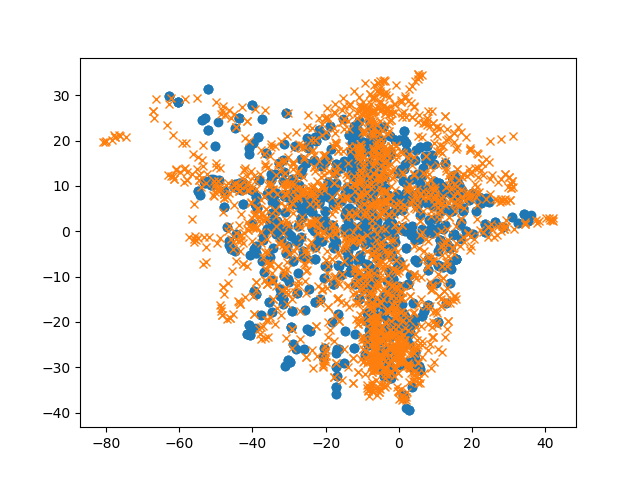

In [23]:
%matplotlib notebook
plt.plot(data['outputApplyX'], data['outputApplyY'],'o')
plt.plot(data['targetX'], data['targetY'], 'x')
plt.show()

In [20]:
xtmp = data['outputEvalNopolX'].values.reshape(data['outputEvalNopolX'].values.shape[0],1)
ytmp = data['outputEvalNopolY'].values.reshape(data['outputEvalNopolY'].values.shape[0],1)
xy = np.concatenate((xtmp, ytmp), axis=1)

Xtarget = data['targetX']
Ytarget = data['targetY']

coefs after fit on Y: [ 0.00000000e+00 -4.35226500e+01  7.02608782e-01 -4.25587460e-02
 -1.95968541e-01  8.34837414e-01  1.12535787e+02]
coefs after fit on X: [-2.05241870e+01  0.00000000e+00  1.63742806e-01  1.10661251e-01
  6.06061795e-01 -2.73875103e-01  1.27914036e+02]
MSE on X rigig transfo fit:  3.6393435225811994
MSE on X poly fit:  6.256502004182674
MSE on y rigig transfo fit:  1.6720729645395185
MSE on y poly fit:  2.687598362728604
mean distance rigid fit:  77.36523047163513
mean distance poly fit:  77.39481832360403


C:\Users\vdel\Anaconda3\envs\tensorflow\lib\site-packages\scipy\optimize\minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
C:\Users\vdel\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


<IPython.core.display.Javascript object>


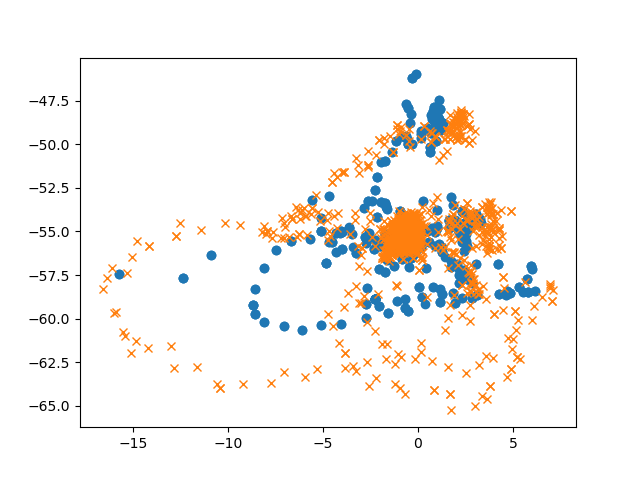

In [21]:
from scipy.optimize import curve_fit

init_vals = [0, 0, 1, 0, 0, 0, 100]
best_valsTotY, covar = curve_fit(transformY, xy, Ytarget, p0=init_vals)
print("coefs after fit on Y:", best_valsTotY)

init_vals = [0, 0, 1, 0, 0, 0, 200]
best_valsTotX, covar = curve_fit(transformX, xy, Xtarget, p0=init_vals)
print("coefs after fit on X:", best_valsTotX)

MSEx = np.mean(np.square(transformX(xy, best_valsTotX[0], best_valsTotX[1], best_valsTotX[2], best_valsTotX[3], best_valsTotX[4], best_valsTotX[5], best_valsTotX[6])-Xtarget))
MSEy = np.mean(np.square(transformY(xy, best_valsTotY[0], best_valsTotY[1], best_valsTotY[2], best_valsTotY[3], best_valsTotY[4], best_valsTotY[5], best_valsTotY[6])-Ytarget))

MSEpolyx = np.mean(np.square(data['outputEvalX']-Xtarget))
MSEpolyy = np.mean(np.square(data['outputEvalY']-Ytarget))

print('MSE on X rigig transfo fit: ', MSEx)
print('MSE on X poly fit: ', MSEpolyx)

print('MSE on y rigig transfo fit: ', MSEy)
print('MSE on y poly fit: ', MSEpolyy)

meanDistRigid = np.mean(euclidDist(Xtarget, Ytarget, transformX(xy, *best_valsTotX), transformY(xy, *best_valsTotY)))
meanDistPoly = np.mean(euclidDist(Xtarget, Ytarget, data['outputEvalX'], data['outputEvalY']))

print('mean distance rigid fit: ',meanDistRigid)
print('mean distance poly fit: ',meanDistPoly)

%matplotlib notebook
plt.plot(transformX(xy, best_valsTotX[0], best_valsTotX[1], best_valsTotX[2], best_valsTotX[3], best_valsTotX[4], best_valsTotX[5], best_valsTotX[6]), transformY(xy, best_valsTotY[0], best_valsTotY[1], best_valsTotY[2], best_valsTotY[3], best_valsTotY[4], best_valsTotY[5], best_valsTotY[6]), 'o')
plt.plot(data['targetX'], data['targetY'],'x')
plt.show()

In [ ]:
npoint = 20
maxval = 200
xyplot = np.zeros((npoint*npoint,2))


for i in range(0,npoint):
    for j in range(0,npoint):
        xyplot[i*npoint+j,0] = maxval*2/npoint*i-npoint*maxval/npoint
        xyplot[i*npoint+j,1] = maxval*2/npoint*j-npoint*maxval/npoint

#print(xyplot)
#xyplot = np.concatenate((np.arange(-100,100), np.arange(-100,100)), axis=0)

xpredTot = transformX(xyplot, best_valsTotX[0], best_valsTotX[1], best_valsTotX[2], best_valsTotX[3], best_valsTotX[4], best_valsTotX[5], best_valsTotX[6])
ypredTot = transformY(xyplot, best_valsTotY[0], best_valsTotY[1], best_valsTotY[2], best_valsTotY[3], best_valsTotY[4], best_valsTotY[5], best_valsTotY[6])


%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xyplot[:,0], xyplot[:,1], xpredTot, c='r', marker='o')
ax.set_xlabel('outputEvalNopolX')
ax.set_ylabel('outputEvalNopolY')
ax.set_zlabel('target X')

ax.scatter(data['outputEvalNopolX'], data['outputEvalNopolY'], data['targetX'], c='b', marker='x')
ax.set_xlabel('outputEvalNopolX')
ax.set_ylabel('outputEvalNopolY')
ax.set_zlabel('target X')

plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xyplot[:,0], xyplot[:,1], ypredTot, c='r', marker='o')
ax.set_xlabel('outputEvalNopolX')
ax.set_ylabel('outputEvalNopolY')
ax.set_zlabel('target y')

ax.scatter(data['outputEvalNopolX'], data['outputEvalNopolY'], data['targetY'], c='b', marker='x')
ax.set_xlabel('outputEvalNopolX')
ax.set_ylabel('outputEvalNopolY')
ax.set_zlabel('target Y')

plt.show()

In [ ]:
regX = poly2ModelX(data)
xpredTot = regX.coef_[0] + regX.coef_[1]*xyplot[:,0] + regX.coef_[2]*xyplot[:,1]
+ regX.coef_[3]*xyplot[:,0]*xyplot[:,0] + regX.coef_[4]*xyplot[:,1]*xyplot[:,1]
+ regX.coef_[5]*xyplot[:,0]*xyplot[:,1]
        
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xyplot[:,0], xyplot[:,1], xpredTot, c='r', marker='o')
ax.set_xlabel('outputEvalNopolX')
ax.set_ylabel('outputEvalNopolY')
ax.set_zlabel('target X')

ax.scatter(data['outputEvalNopolX'], data['outputEvalNopolY'], data['targetX'], c='b', marker='x')
ax.set_xlabel('outputEvalNopolX')
ax.set_ylabel('outputEvalNopolY')
ax.set_zlabel('target X')

plt.show()

In [ ]:
regY = poly2ModelY(data)
ypredTot = regY.coef_[0] + regY.coef_[1]*xyplot[:,0] + regY.coef_[2]*xyplot[:,1]
+ regY.coef_[3]*xyplot[:,0]*xyplot[:,0] + regY.coef_[4]*xyplot[:,1]*xyplot[:,1]
+ regY.coef_[5]*xyplot[:,0]*xyplot[:,1]
        
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xyplot[:,0], xyplot[:,1], ypredTot, c='r', marker='o')
ax.set_xlabel('outputEvalNopolX')
ax.set_ylabel('outputEvalNopolY')
ax.set_zlabel('target Y')

ax.scatter(data['outputEvalNopolX'], data['outputEvalNopolY'], data['targetY'], c='b', marker='x')
ax.set_xlabel('outputEvalNopolX')
ax.set_ylabel('outputEvalNopolY')
ax.set_zlabel('target Y')

plt.show()

In [ ]:
init_vals = [0, 0, 0, 1, 1, 0, 0, 0, 0, 200, 1]
bestValsShearX, covar = curve_fit(transfoShearRotateX, xy, Xtarget, p0=init_vals)
print("coefs after fit on X:", bestValsShearX)

init_vals = [0, 0, 0, 1, 1, 0, 0, 0, 0, 100, 1]
bestValsShearY, covar = curve_fit(transfoShearRotateY, xy, Ytarget, p0=init_vals)
print("coefs after fit on Y:", bestValsShearY)

MSEx = np.mean(np.square(transfoShearRotateX(xy, *bestValsShearX)-Xtarget))
MSEy = np.mean(np.square(transfoShearRotateY(xy, *bestValsShearY)-Ytarget))

MSEpolyx = np.mean(np.square(data['outputEvalX']-Xtarget))
MSEpolyy = np.mean(np.square(data['outputEvalY']-Ytarget))

print('MSE on X shear and scale fit: ', MSEx)
print('MSE on X poly fit: ', MSEpolyx)

print('MSE on y shear and scale fit: ', MSEy)
print('MSE on y poly fit: ', MSEpolyy)

%matplotlib inline
plt.plot(transfoShearRotateX(xy, *bestValsShearX), transfoShearRotateY(xy, *bestValsShearY), 'o')
plt.plot(data['targetX'], data['targetY'],'x')
plt.show()